# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [3]:
#store cities into a dataframe and setting the first column to "City"

cities_df = pd.DataFrame(cities)
cities_df.columns = ["City"]
cities_df.head()

,City
0,boundiali
1,coihaique
2,tiksi
3,ushuaia
4,rawannawi


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0

#creating empty lists
data = []
lat = []
long = []
temp = []
humidity = []
cloudiness = []
wind_speed = []


for index,row in cities_df.iterrows():
    count+= 1
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + row['City']
    
    
    try:
        weather_response = requests.get(query_url)
        cityweather = weather_response.json()
        data.append(cityweather['dt'])
        lat.append(cityweather['coord']['lat'])
        long.append(cityweather['coord']['lat'])
        temp.append(cityweather['main']['temp'])
        humidity.append(cityweather['main']['humidity'])
        cloudiness.append(cityweather['clouds']['all'])
        wind_speed.append(cityweather['wind']['speed'])
        
        print("Now retieving city #" + str(count) + " | " + str(row["City"]))
        print(query_url)
          
    except KeyError:
        print("City not found. Skipping...")
        
    continue      
          
print('-------------------------------')
print('Data Processing Complete')
print('-------------------------------')

Now retieving city #1 | boundiali
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=boundiali
Now retieving city #2 | coihaique
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=coihaique
Now retieving city #3 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=tiksi
Now retieving city #4 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=ushuaia
City not found. Skipping...
Now retieving city #6 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=barrow
Now retieving city #7 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=leningradskiy
Now retieving city #8 | brae
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc

City not found. Skipping...
Now retieving city #67 | bria
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=bria
Now retieving city #68 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=busselton
Now retieving city #69 | chebenki
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=chebenki
Now retieving city #70 | yulara
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=yulara
Now retieving city #71 | zelenoborsk
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=zelenoborsk
Now retieving city #72 | avera
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=avera
Now retieving city #73 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5

Now retieving city #130 | takoradi
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=takoradi
Now retieving city #131 | salinas
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=salinas
Now retieving city #132 | rize
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=rize
Now retieving city #133 | golden
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=golden
City not found. Skipping...
Now retieving city #135 | rio grande
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=rio grande
Now retieving city #136 | usinsk
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=usinsk
Now retieving city #137 | dudinka
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566c

Now retieving city #190 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=tazovskiy
Now retieving city #191 | homer
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=homer
City not found. Skipping...
City not found. Skipping...
Now retieving city #194 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=hilo
Now retieving city #195 | nikki
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=nikki
Now retieving city #196 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=petropavlovsk-kamchatskiy
Now retieving city #197 | marchena
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=marchena
Now retieving city #198 | clyde river
http://a

Now retieving city #252 | xuanwu
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=xuanwu
City not found. Skipping...
Now retieving city #254 | bilibino
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=bilibino
Now retieving city #255 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=katsuura
Now retieving city #256 | algeciras
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=algeciras
Now retieving city #257 | fortuna
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=fortuna
Now retieving city #258 | vila velha
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=vila velha
Now retieving city #259 | koslan
http://api.openweathermap.org/data/2.5/weather?appid=be81

Now retieving city #311 | mamakan
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=mamakan
Now retieving city #312 | port blair
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=port blair
Now retieving city #313 | sawakin
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=sawakin
Now retieving city #314 | grindavik
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=grindavik
Now retieving city #315 | cururupu
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=cururupu
Now retieving city #316 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=komsomolskiy
Now retieving city #317 | gamba
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553

Now retieving city #373 | klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=klaksvik
Now retieving city #374 | iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=iqaluit
Now retieving city #375 | vigrestad
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=vigrestad
City not found. Skipping...
Now retieving city #377 | watsa
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=watsa
Now retieving city #378 | atar
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=atar
Now retieving city #379 | port hawkesbury
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=port hawkesbury
Now retieving city #380 | dolores
http://api.openweathermap.org/data/2.5/weather?appid=be8

Now retieving city #436 | palafrugell
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=palafrugell
Now retieving city #437 | mao
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=mao
Now retieving city #438 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=hithadhoo
Now retieving city #439 | marawi
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=marawi
Now retieving city #440 | varhaug
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=varhaug
Now retieving city #441 | bafoulabe
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=bafoulabe
Now retieving city #442 | katipunan
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&un

Now retieving city #498 | chapais
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=chapais
Now retieving city #499 | caravelas
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=caravelas
Now retieving city #500 | luwuk
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=luwuk
Now retieving city #501 | ancud
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=ancud
Now retieving city #502 | mareeba
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=mareeba
City not found. Skipping...
Now retieving city #504 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=comodoro rivadavia
Now retieving city #505 | durusu
http://api.openweathermap.org/data/2.5/weather?appi

City not found. Skipping...
Now retieving city #558 | bourail
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=bourail
Now retieving city #559 | camocim
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=camocim
Now retieving city #560 | cockburn town
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=cockburn town
Now retieving city #561 | melbu
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=melbu
City not found. Skipping...
Now retieving city #563 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=bandarbeyla
Now retieving city #564 | senno
http://api.openweathermap.org/data/2.5/weather?appid=be81c2ba50ae5566cc5c553e7e338888&units=Imperial&q=senno
Now retieving city #565 | labuhan
http://api.openweathermap.or

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_dict = {
    "City": city,
    "Cloudiness":cloudiness, 
    "Date":data, 
    "Humidity (%)": humidity,
    "Latitude":lat, 
    "Longitude":long, 
    "Temperature (F)": temp,
    "Wind Speed (MPH)":wind_speed
}

# Creating data frame from dictionary
weather_data = pd.DataFrame(weather_dict)

# Display count of weather data values 
weather_data.head()

,City,Cloudiness,Date,Humidity (%),Latitude,Longitude,Temperature (F),Wind Speed (MPH)
0,diego de almagro,80,1553388200,46,9.53,9.53,79.36,3.15
1,diego de almagro,40,1553385600,76,-45.58,-45.58,50.79,3.15
2,diego de almagro,64,1553388158,77,71.64,71.64,4.39,4.05
3,diego de almagro,40,1553385600,62,-54.81,-54.81,51.62,9.17
4,diego de almagro,24,1553387983,85,-38.31,-38.31,57.85,12.77


#### Latitude vs. Temperature Plot

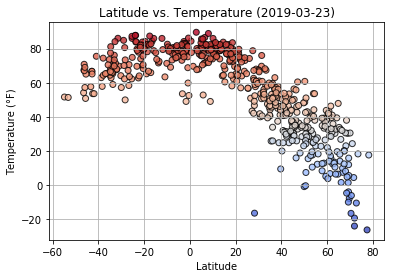

In [12]:
plt.scatter(weather_data['Latitude'],
           weather_data['Temperature (F)'],
           c=weather_data["Temperature (F)"],
           edgecolor="black", linewidths=1, marker="o",
           cmap="coolwarm", alpha=0.8, label="City" )
plt.title("Latitude vs. Temperature (" + datetime.now().strftime('%Y-%m-%d') + ")")
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.savefig("latitude_vs_temp_scatter_plot.png")
plt.show()

#### Latitude vs. Humidity Plot

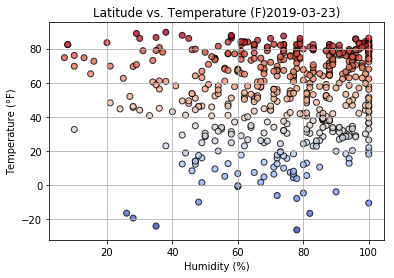

In [14]:
plt.scatter(weather_data["Humidity (%)"],
           weather_data["Temperature (F)"],
           c=weather_data["Temperature (F)"],
           edgecolor="black", linewidths=1, marker="o",
           cmap="coolwarm", alpha=0.8, label="City" )
plt.title("Latitude vs. Temperature (F)" + datetime.now().strftime('%Y-%m-%d') + ")")
plt.xlabel("Humidity (%)", fontsize=10)
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.savefig("humidity_vs_temp_scatter_plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

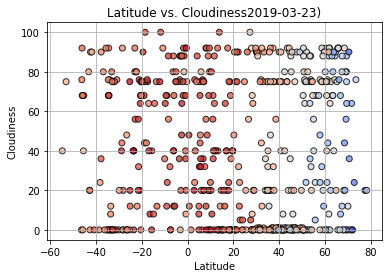

In [17]:
plt.scatter(weather_data["Latitude"],
           weather_data["Cloudiness"],
           c=weather_data["Temperature (F)"],
           edgecolor="black", linewidths=1, marker="o",
           cmap="coolwarm", alpha=0.8, label="City" )
plt.title("Latitude vs. Cloudiness" + datetime.now().strftime('%Y-%m-%d') + ")")
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("latitude_vs_cloudiness_scatter_plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

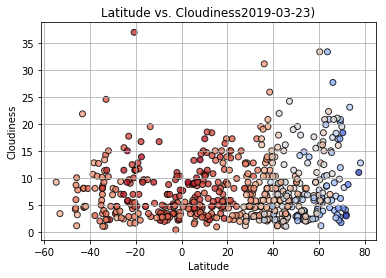

In [20]:
plt.scatter(weather_data["Latitude"],
           weather_data["Wind Speed (MPH)"],
           c=weather_data["Temperature (F)"],
           edgecolor="black", linewidths=1, marker="o",
           cmap="coolwarm", alpha=0.8, label="City" )
plt.title("Latitude vs. Cloudiness" + datetime.now().strftime('%Y-%m-%d') + ")")
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("latitude_vs_windspeed_scatter_plot.png")
plt.show()